# Roof top module data processor

## 1. Import the packages

In [1]:
import pyodbc
from sqlalchemy import create_engine
import csv
from data_processor_object import *
import matplotlib.pyplot as plt
import os
import glob

## 2. Input

### 2.1. Input parameter desciptions

| Parameter Name | Format | Description | Example |
| --- | --- | --- | --- |
| path | string | a path of the folder the access file for module IV data is stored | r'C:\Users\sijin wang\Desktop\research\RA\Module_data_project\data'|
| starting_day | string | the first day to start plotting | '2022_1_2' |
| ending_day | string | the last day to plot | '2022_12_31' |
| starting_time | string | the time in the first day to start plotting | '8:00:00 AM' |
| ending_time | string | the time in the last day to plot | '9:00:00 PM' |
| module_number_list | integer list | a list of module to investigate, ranging from 1 to 6 | [1, 3, 6] |
| sample_length | string | the period for resampling | 'hour', 'day', 'month' (other input won't make it resample)|
| percentile | integer | select the top percnetile of the electrical data | 90 |
| T_cetral | float | the central temperature value to select, unit is C | 45 |
| dT | float | the selected data should be with the range of T_central $\pm$ dT| 5 |
| Ir_central | float | the central irradiance value to select, unit is W/m2 | 800 |
| dIr | float | the selected data should be with the range of Ir_central $\pm$ dIr| 50 |


### 2.2 Input cell

In [2]:
# path to read
# path = r'C:\Users\sijin wang\Desktop\research\RA\Module_data_project\data'
path = r'C:\Users\sijin wang\OneDrive - UNSW\RA\Roof_module_data'

# plotting time
starting_day = '2022_1_1'
ending_day = '2022_3_9'
starting_time = '8:00:00 AM'
ending_time = '9:00:00 PM'

# define the resampling parameters
sample_length = 'hour'
percentile = 90

# define the data selection parameters
# for temperatures:
T_central=45
dT = 50
# for irradiance:
Ir_central = 800
dIr = 50

## 3.Data Processing

What the following cell does:
* Count the days we need to include for data analysis.
* Extract the selected days from access file to pd Dataframe.
* After successfully extract the data for each days, the processed date will be printed.

In [3]:
# create a list of paths of each access file we need to open
paths = []
# Loop through all the files in the folder and add their paths to the list
for file_name in os.listdir(path):
    if os.path.isfile(os.path.join(path, file_name)):
        paths.append(str((os.path.join(path, file_name))))

# define the object
data1 = module_data_processor(path = paths, starting_day=starting_day, ending_day=ending_day, starting_time=starting_time, ending_time=ending_time)

# create a list of list for all dates to select paths.
data1.file_date_reader()


Extract the data from all the access files

In [4]:
# extract the data from the access files
data1.data_extractor(removezero=True, store_df=True)

2022_1_1IV
2022_1_2IV
2022_1_3IV
2022_1_25IV
2022_1_26IV
2022_1_27IV
2022_1_28IV
2022_1_29IV
2022_1_30IV
2022_1_31IV
2022_2_1IV
2022_2_2IV
2022_2_3IV
2022_2_4IV
2022_2_5IV
2022_2_6IV
2022_2_7IV
2022_2_8IV
2022_2_9IV
2022_2_10IV
2022_2_11IV


Access the stored pickle file if the data was extracted before

In [ ]:
# load the saved pd dataframe file
data1.pickle_extractor()

Successfully found the pickle file, The pickle file name is: 2022_1_12022_3_9.pkl


## 4. Visualization

### 4.1. The module comparison

#### 4.1.0. Select the module

In [ ]:
module_number_list = [1, 6]

What the following cell does:
* Select the data based on which module to plot.
* Resample the data based on the defined sample length, and select the top xx percentile.
* select the data to restrict the temperature and irradiance range, temperature only include T_central $\pm$ dT and irradiance only include Ir_central $\pm$ dIr.

In [ ]:
# select the module to plot: range from 1 to 6
data1.module_selector(module_num_list=module_number_list)

# resample the module: options are 'hour', 'day', 'month', put anything else it will not resample.
data1.multi_module_resampler(sample_length=sample_length, quantile_v=percentile/100)
# print(data1.module_df_sampled)

# Select Temperature and Irradiance range
data1.bin_selector(param_name='MT', centre_value=T_central, rangevalue=dT)
data1.bin_selector(param_name='IR_BEV', centre_value=Ir_central, rangevalue=dIr)
# print(data1.module_df_sampled)

c:\Users\sijin wang\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\apply.py:577: FutureWarning: Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.
  return f(*args, **kwargs)


Please select the parameters to plot against.

The available option for parameters are: 'Absolute humidity %', 'Ambient temperature (C)', 'Modulte temperature (C)', 'Irradiance (W/m2)', 'Voc(V)', 'Isc(A)', 'Maximum power voltage (V)', 'Maximum power current (A)', 'Maximum power (W)', 'Fill factor (%)', 'Efficiency (%)'.

#### 4.1.1. Plotting

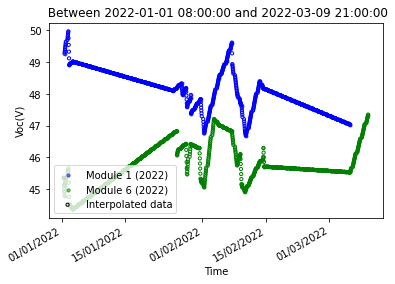

In [ ]:
available_list = ['Absolute humidity %', 'Ambient temperature (C)', 'Modulte temperature (C)', 'Irradiance (W/m2)', 'Voc(V)', 'Isc(A)', 'Maximum power voltage (V)', 'Maximum power current (A)', 'Maximum power (W)', 'Fill factor (%)', 'Efficiency (%)']
# y_name = input('Please select a parameter to compare on: ')
y_name = 'Voc(V)'
if y_name in available_list:
    # whether_interpolate = input('Do you want the data to be interpolated based on sampling period? (YES or NO)')
    whether_interpolate = 'YES'
    if whether_interpolate == 'YES':
        data1.data_ploter_with_time_multimodule(target_name=data1.param_name_dict[str(y_name)], interpol=True)
    else:
        data1.data_ploter_with_time_multimodule(target_name=data1.param_name_dict[str(y_name)])
else:
    print('Please select a parameter name from the available list')

### 4.2. Plot parameter vs parameter for one module

#### 4.2.0. Select the module (select one module only)

In [ ]:
module_number_list = [6]

What the following cell does:
* Select the data based on which module to plot.
* Resample the data based on the defined sample length, and select the top xx percentile.
* select the data to restrict the temperature and irradiance range, temperature only include T_central $\pm$ dT and irradiance only include Ir_central $\pm$ dIr.

In [ ]:
# select the module to plot: range from 1 to 6
data1.module_selector(module_num_list=module_number_list)

# resample the module: options are 'hour', 'day', 'month', put anything else it will not resample.
data1.multi_module_resampler(sample_length=sample_length, quantile_v=percentile/100)

# Select Temperature and Irradiance range
data1.bin_selector(param_name='MT', centre_value=T_central, rangevalue=dT)
data1.bin_selector(param_name='IR_BEV', centre_value=Ir_central, rangevalue=dIr)

c:\Users\sijin wang\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\apply.py:577: FutureWarning: Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.
  return f(*args, **kwargs)


### 4.2.1. Plotting against each other

Please select the parameters to plot against.

The available option for parameters are: 'Absolute humidity %', 'Ambient temperature (C)', 'Module temperature (C)', 'Irradiance (W/m2)', 'Voc(V)', 'Isc(A)', 'Maximum power voltage (V)', 'Maximum power current (A)', 'Maximum power (W)', 'Fill factor (%)', 'Efficiency (%)'.

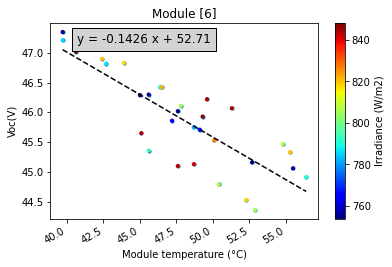

In [ ]:
available_list = ['Absolute humidity %', 'Ambient temperature (C)', 'Module temperature (C)', 'Irradiance (W/m2)', 'Voc(V)', 'Isc(A)', 'Maximum power voltage (V)', 'Maximum power current (A)', 'Maximum power (W)', 'Fill factor (%)', 'Efficiency (%)']
# x_name = input('Which parameter to put in x axis (choose from the available options)')
# y_name = input('Which parameter to put in y axis (choose from the available options)')
x_name = 'Module temperature (C)'
y_name = 'Voc(V)'
# print(x_name)
if x_name in available_list and y_name in available_list:
    # whether_color_code = input('Do you want a color code 3rd dimension? (YES or NO)')
    whether_color_code = 'YES'
    if whether_color_code == 'NO':
        data1.data_parameter_plot_multimodule(x_name=data1.param_name_dict[str(x_name)], y_name=data1.param_name_dict[str(y_name)], linear_fit=True, color_code=False)
    else:
        # color_code_name = input('Which parameter to color code (choose from the available options)')
        color_code_name = 'Irradiance (W/m2)'
        if color_code_name in available_list:
            data1.data_parameter_plot_multimodule(x_name=data1.param_name_dict[str(x_name)], y_name=data1.param_name_dict[str(y_name)], linear_fit=True, color_code=True, color_name=data1.param_name_dict[str(color_code_name)], module_title=True)
        else:
            print('Please select the color code parameter name from the available list')
else:
    print('Please choose both x and y names from the availabe list')

### 4.3. Plotting degredation

#### 4.3.0. Select the module (select one module only)

In [ ]:
module_number_list = [1]

What the following cell does:
* Select the data based on which module to plot.
* Resample the data based on the defined sample length, and select the top xx percentile.
* select the data to restrict the temperature and irradiance range, temperature only include T_central $\pm$ dT and irradiance only include Ir_central $\pm$ dIr.

In [ ]:
# select the module to plot: range from 1 to 6
data1.module_selector(module_num_list=module_number_list)

# resample the module: options are 'hour', 'day', 'month', put anything else it will not resample.
data1.multi_module_resampler(sample_length=sample_length, quantile_v=percentile/100)

# Select Temperature and Irradiance range
data1.bin_selector(param_name='MT', centre_value=T_central, rangevalue=dT)
data1.bin_selector(param_name='IR_BEV', centre_value=Ir_central, rangevalue=dIr)

c:\Users\sijin wang\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\apply.py:577: FutureWarning: Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.
  return f(*args, **kwargs)


#### 4.3.1. Plotting

Please select the parameter to view degredation.

The available option for parameters are: 'Absolute humidity %', 'Ambient temperature (C)', 'Modulte temperature (C)', 'Irradiance (W/m2)', 'Voc(V)', 'Isc(A)', 'Maximum power voltage (V)', 'Maximum power current (A)', 'Maximum power (W)', 'Fill factor (%)', 'Efficiency (%)'.

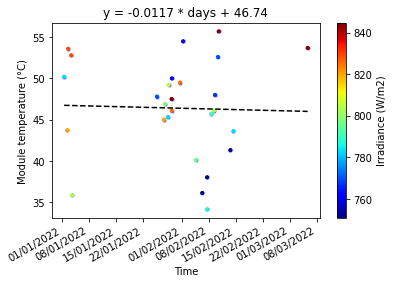

In [ ]:
# param_name = input('Which parameter to put in y axis (choose from the available options)')
param_name = 'Efficiency (%)'
# print(x_name)
if param_name in available_list:
    # whether_color_code = input('Do you want a color code 3rd dimension? (YES or NO)')
    whether_color_code = 'YES'
    if whether_color_code == 'NO':
        data1.data_ploter_with_time_multimodule(target_name=data1.param_name_dict[str(x_name)])
    else:
        # color_code_name = input('Which parameter to color code (choose from the available options)')
        color_code_name = 'Irradiance (W/m2)'
        if color_code_name in available_list:
            data1.data_ploter_with_time_multimodule(target_name=data1.param_name_dict[str(x_name)], linear_fit=True, color_code=True, color_name=data1.param_name_dict[str(color_code_name)])
        else:
            print('Please select the color code parameter name from the available list')
else:
    print('Please choose the parameter names from the availabe list')